In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from math import floor

#Setting default styles
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

Downloading and Storing stock data

In [30]:
symbol='GOOGL'
start='2022-01-01'
end='2023-01-01'
df=yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [27]:
#Dopping columns and rows with NaN values
df=df.dropna()

#Displaying stock prices
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,101.019997,102.250000,100.250000,100.989998,100.989998,28687100
2022-12-02,99.050003,100.769997,98.900002,100.440002,100.440002,21480700
2022-12-05,99.400002,101.379997,99.000000,99.480003,99.480003,24405100
2022-12-06,99.300003,99.779999,96.419998,96.980003,96.980003,24910700
2022-12-07,96.410004,96.879997,94.720001,94.940002,94.940002,31045400


# 1. **Williams%R Indicator**

Founded by Larry Williams, the Williams %R is a momentum indicator whose values oscillate between **0 to -100**. Traders use this indicator to spot potential entry and exit points for trades by constructing two levels of overbought and oversold. 

**Formula**- 
## _`W%R_14 = [ H.HIGH - C.PRICE ] / [ L.LOW - C.PRICE ] * ( - 100 )`_

where,

W%R 14 = 14-day Williams %R of the stock

H.HIGH = 14-day Highest High of the stock

L.LOW = 14-day Lowest Low of the stock

C.PRICE = Closing price of the stock






In [31]:
def williamsR(high, low, close, time):

  highesth=high.rolling(time).max()
  lowestl=low.rolling(time).min()

  williams=((highesth-close)/(highesth-lowestl))*(-100)

  return williams
 
#adding wr column using the above function
df['wr'] = williamsR(df['High'], df['Low'], df['Close'], 14)

df=df.dropna()

df

,Open,High,Low,Close,Adj Close,Volume,wr
Date,,,,,,,
2022-01-21,132.593506,134.865494,130.086502,130.351501,130.351501,55652000,-98.384002
2022-01-24,125.977997,131.203003,124.500000,130.804001,130.804001,76622000,-71.325901
2022-01-25,128.740005,129.399002,126.500504,126.934998,126.934998,46960000,-87.824706
2022-01-26,131.119003,133.000000,127.141998,129.233002,129.233002,49130000,-74.207084
2022-01-27,131.304001,132.652496,128.932495,129.005005,129.005005,31950000,-75.449573
...,...,...,...,...,...,...,...
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000,-78.380358
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300,-91.900077
2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200,-99.411374


Plotting Closing price and Williams%R for the given stock

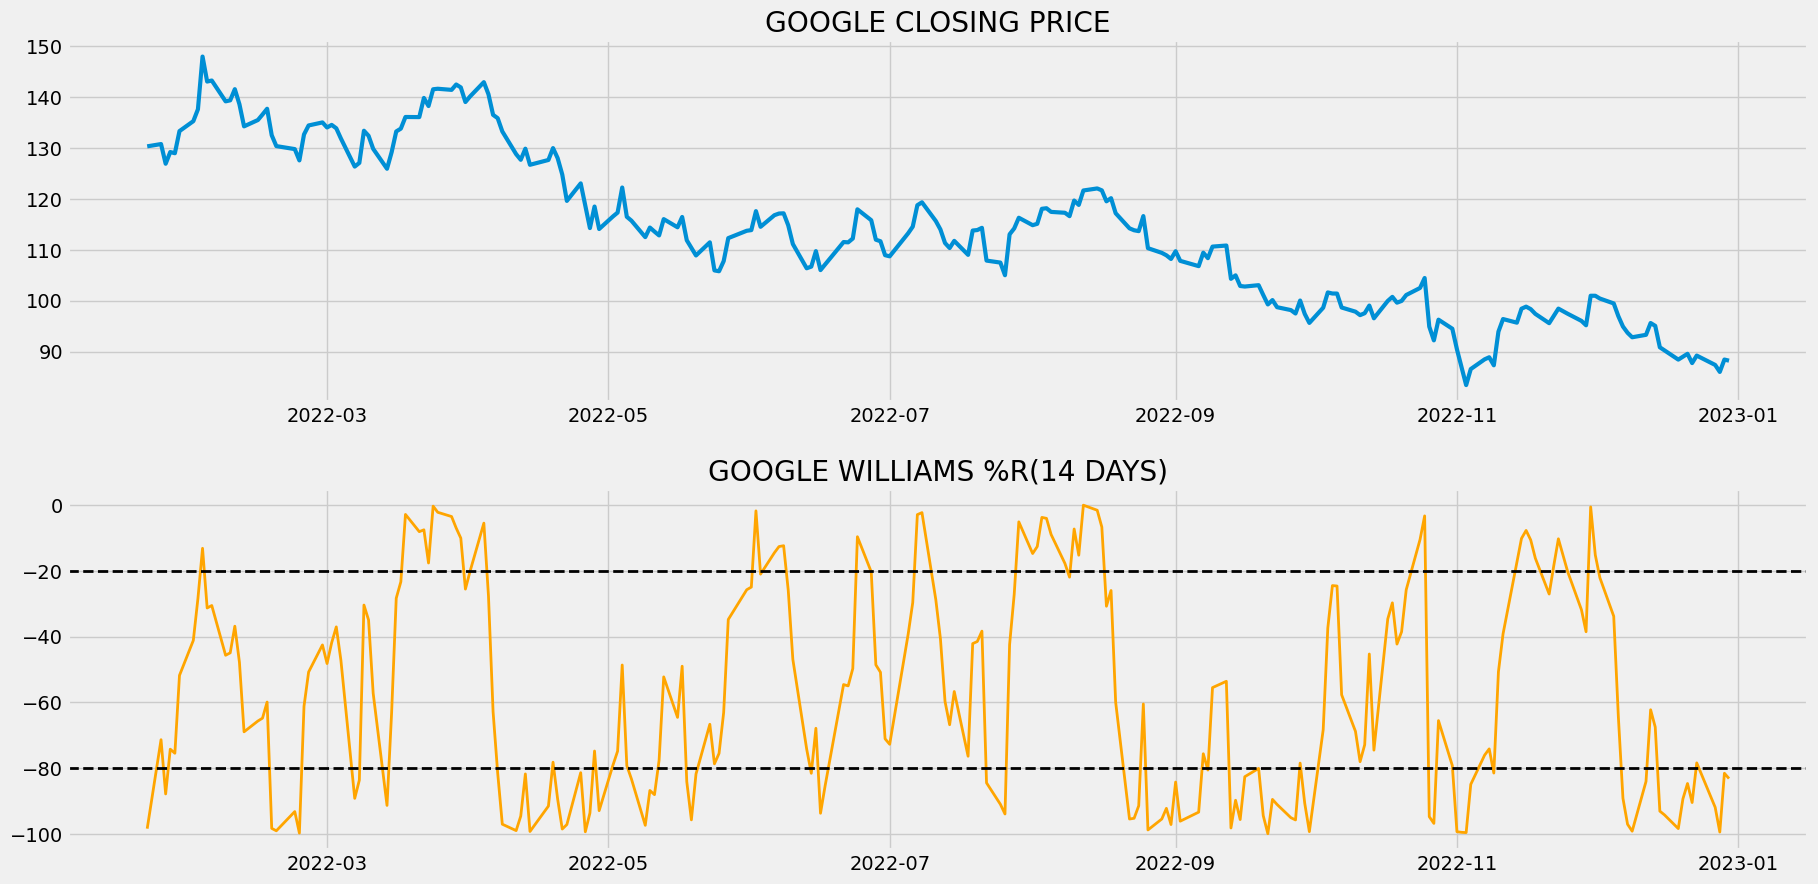

In [32]:
graph1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 2)
graph2 = plt.subplot2grid((11,1), (6,0), rowspan = 6, colspan = 2)

graph1.plot(df['Close'], linewidth = 3)
graph1.set_title('GOOGLE CLOSING PRICE')

graph2.plot(df['wr'], color = 'orange', linewidth = 2)
graph2.axhline(-20, linewidth = 2, linestyle = '--', color = 'black')
graph2.axhline(-80, linewidth = 2, linestyle = '--', color = 'black')
graph2.set_title('GOOGLE WILLIAMS %R(14 DAYS)')

plt.show()

# 2. Average True Range (ATR)

The average true range (ATR) is a market volatility indicator used in technical analysis. It is typically derived from the 14-day simple moving average of a series of true range indicators. ATR shows investors the average range prices swing for an investment over a specified period.

The formula for ATR is:

#           _`[Previous ATR (n - 1) + TR ] / n`_




n= number of periods

TR= the true range


If there is not a previous ATR calculated, you must use:


( 1 / n ) Σni TRi

Where:

TRi = a particular true range, such as the first day's TR, then the second, then third
n = the number of periods

## _`TR = Max [ ( H − L ), Abs ( H − CP ), Abs ( L − CP ) ]`_

H = Today's high

L = Today's low

Cp = Yesterday's closing price

Max = The highest value of the three terms


In [33]:
symbol='GOOGL'
start='2022-01-01'
end='2023-01-01'
data=yf.download(symbol,start,end)
data.dropna()
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,145.054993,145.850998,143.712997,144.991501,144.991501,28646000
2022-01-04,145.395996,146.485001,143.716507,144.399506,144.399506,28400000
2022-01-05,144.419998,144.499496,137.688004,137.774994,137.774994,54618000
2022-01-06,136.998505,139.940002,136.558502,137.747498,137.747498,37348000
2022-01-07,138.145493,138.448502,135.766495,137.016998,137.016998,29760000


Defining ATR:

In [34]:
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())
low_cp = np.abs(data['Low'] - data['Close'].shift())
df = pd.concat([high_low, high_cp, low_cp], axis=1)
true_range = np.max(df, axis=1)
average_true_range = true_range.rolling(14).mean()


In [35]:
#Adding ATR column to the data:
data['ATR'] = average_true_range
data.dropna()
data.head()

,Open,High,Low,Close,Adj Close,Volume,ATR
Date,,,,,,,
2022-01-03,145.054993,145.850998,143.712997,144.991501,144.991501,28646000,NaN
2022-01-04,145.395996,146.485001,143.716507,144.399506,144.399506,28400000,NaN
2022-01-05,144.419998,144.499496,137.688004,137.774994,137.774994,54618000,NaN
2022-01-06,136.998505,139.940002,136.558502,137.747498,137.747498,37348000,NaN
2022-01-07,138.145493,138.448502,135.766495,137.016998,137.016998,29760000,NaN


Plotting Close price and ATR:

<ipython-input-36-3fc42891ebec>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(data['ATR'] , 'm', label='ATR',color='orange',linewidth=2.5)


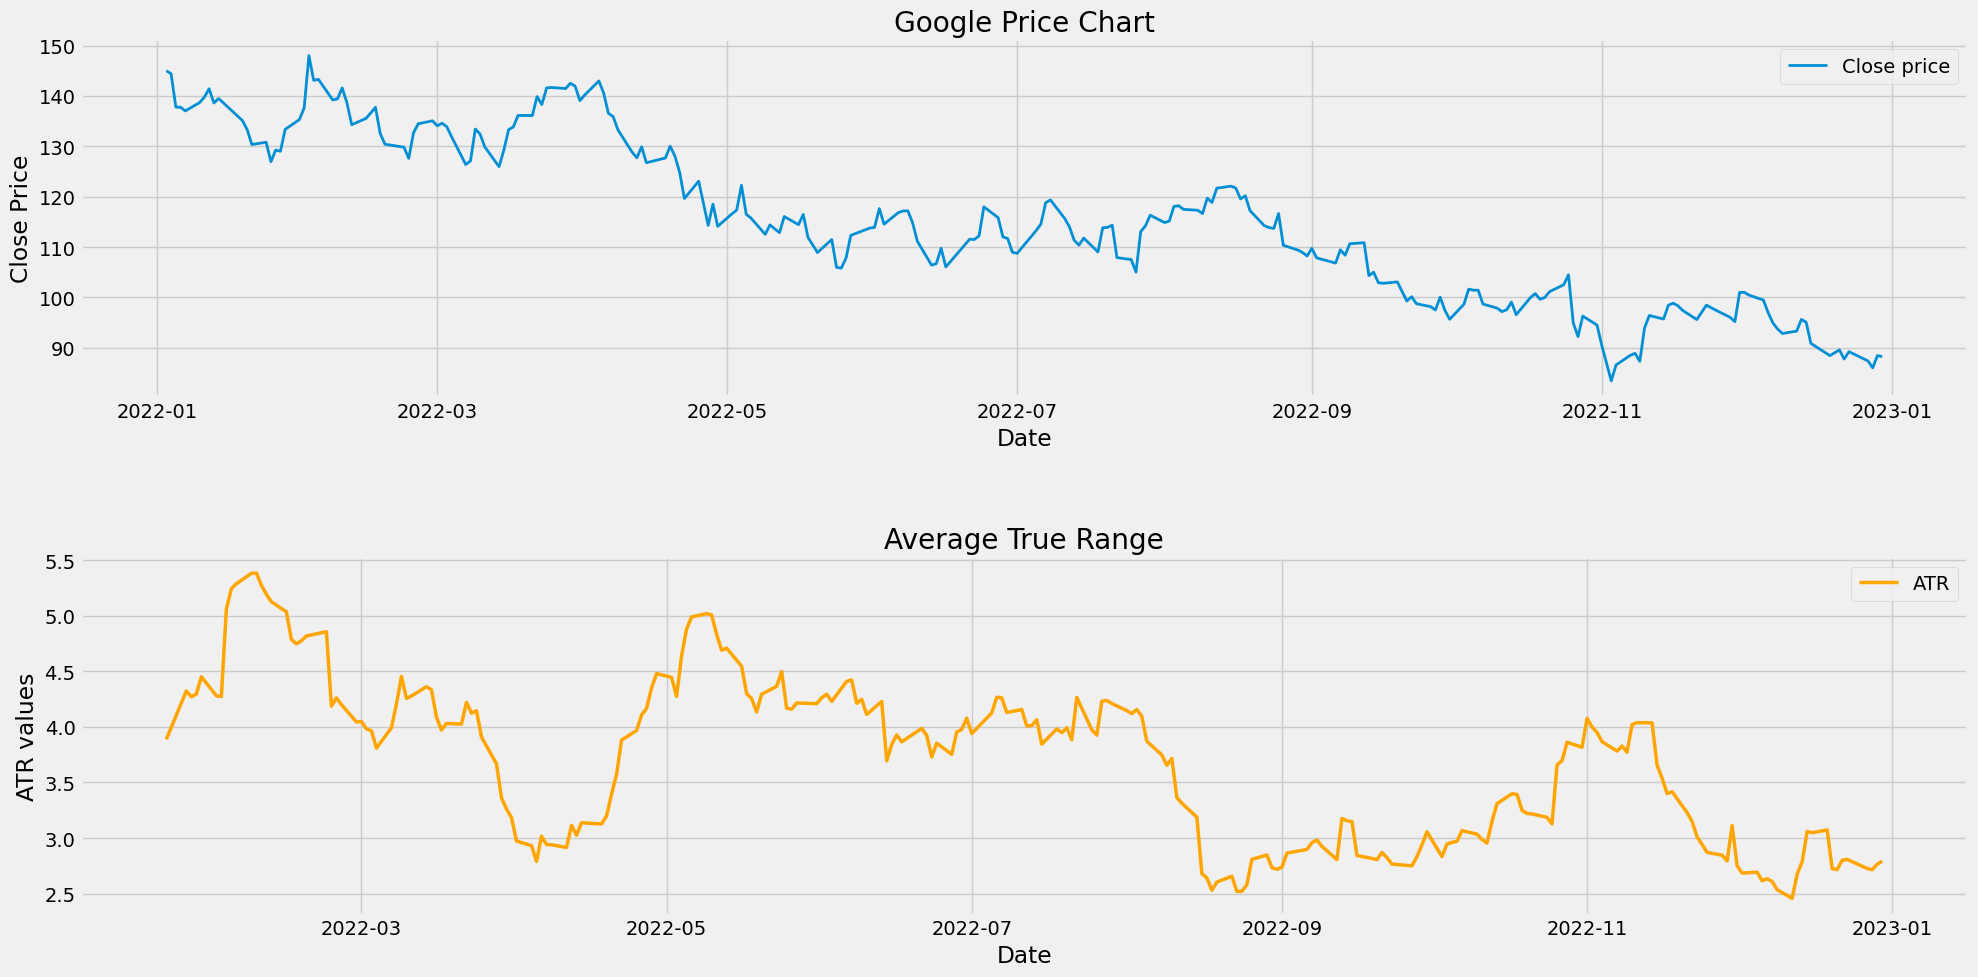

In [36]:
# Define position of 1st subplot
ax = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 2)

# Set the title and axis labels
plt.title('Google Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price', linewidth=2)

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx= plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 2)

# Set the title and axis labels
plt.title('Average True Range')
plt.xlabel('Date')
plt.ylabel('ATR values')

plt.plot(data['ATR'] , 'm', label='ATR',color='orange',linewidth=2.5)

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()

# 3. Money Flow Index

The **Money Flow Index (MFI)** is a momentum indicator that measures the flow of money into and out of a security over a specified period of time. The MFI is calculated by accumulating positive and negative Money Flow values (see Money Flow), then creating a **Money Ratio**. The Money Ratio is then normalized into the MFI oscillator form.

Calculation:

## *Typical Price = (High + Low + Close)/3*

# _`Money Flow = Typical Price * Volume`_



*   If today's Typical Price is greater than yesterday's Typical Price,it is considered Positive Money Flow.
*   If today's price is less, it is considered Negative Money Flow.

<br>


Money Flow Ratio= 
14-Period Negative Money Flow/
14-Period Positive Money Flow
​

# _``Money Flow Index=100−100/(1+Money Flow Ratio)``_


Downloading and storing stock data


In [37]:
symbol='GOOGL'
start='2016-01-01'
end='2021-01-01'
data=yf.download(symbol,start,end)
data.dropna()
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000


Defining gain and loss function:

In [38]:
def gain(x):
    return ((x > 0) * x).sum()


def loss(x):
    return ((x < 0) * x).sum()

Defining MFI function from the above mentioned formula:

In [39]:
def mfi(high, low, close, volume, n=14):
  
    typical_price = (high + low + close)/3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign
    mf_avg_gain = signed_mf.rolling(n).apply(gain, raw=True)
    mf_avg_loss = signed_mf.rolling(n).apply(loss, raw=True)
    return (100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))).to_numpy()

In [40]:
#Adding MFI column to data
data['MFI'] = mfi(data['High'], data['Low'], data['Close'], data['Volume'], 14)
data.dropna()
data.head()

,Open,High,Low,Close,Adj Close,Volume,MFI
Date,,,,,,,
2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000,NaN
2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000,NaN
2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000,NaN
2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000,NaN
2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000,NaN


Plotting close price and MFI:

<ipython-input-41-a92a6fb94f26>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(data['MFI'], 'm', label='MFI',linewidth=2, color='orange')


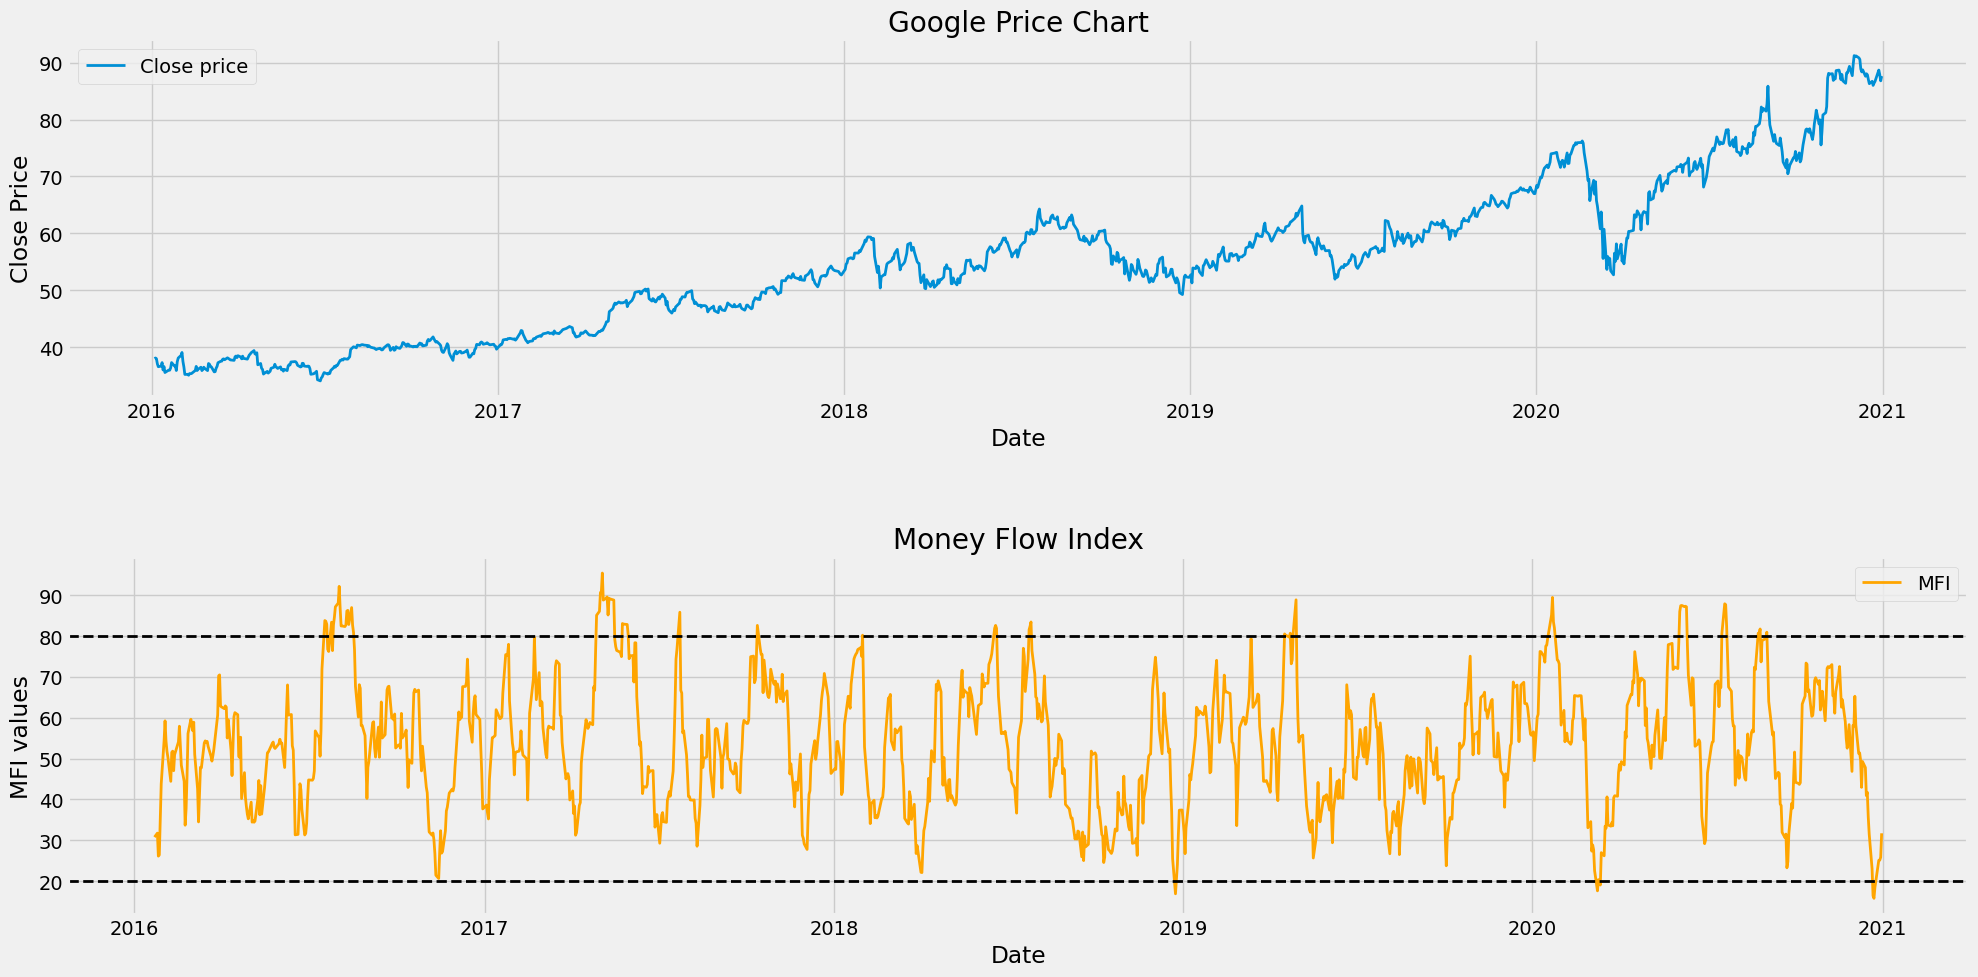

In [41]:
# Define position of 1st subplot
fig1=plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 2)

# Set the title and axis labels
plt.title('Google Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price', linewidth=2)

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx= plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 2)

# Set the title and axis labels
plt.title('Money Flow Index')
plt.xlabel('Date')
plt.ylabel('MFI values')


plt.plot(data['MFI'], 'm', label='MFI',linewidth=2, color='orange')
bx.axhline(20, linewidth = 2, linestyle = '--', color = 'black')
bx.axhline(80, linewidth = 2, linestyle = '--', color = 'black')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()


# 4. Elder force index
The Elder Force Index indicator is used to measure the power driving a movement in the price. It tries to highlight potential price reversals and corrections by analyzing the direction, length, and volume driving the price movement.

It is calculated by subtracting yesterday's close from today's close (net change) and multiplying the result by today's volume. 

# _``EFI = (Curr.Close - Prev.Close)*(Curr.Volume)``_

Where, <br>
Curr.Close = Current period Closing Price <br>
Prev.Close = Previous Period Closing Price <br>
Curr.Volume = Current Period Volume



Defining Force Index function to calculate the Force Index:

In [42]:
def ForceIndex(data, ndays): 
    FI = pd.Series(data['Close'].diff(ndays) * data['Volume'], name = 'ForceIndex') 
    data = data.join(FI) 
    return data

# Computing Force Index
Using the function defined above, we compute the Force Index for GOOGLE. <br>
Note that:


*   If closing prices are higher today than yesterday, the force index is positive.
*   If closing prices are lower than yesterday's, the force index is negative.

In [43]:
# Compute the Force Index for GOOGL
n = 1
G_ForceIndex = ForceIndex(data,n)
data['ForceIndex']=G_ForceIndex['ForceIndex']
data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,MFI,ForceIndex
Date,,,,,,,,
2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000,NaN,NaN
2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000,NaN,4.725064e+06
2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000,NaN,-5.302689e+06
2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000,NaN,-5.786048e+07
2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000,NaN,-2.396666e+07
...,...,...,...,...,...,...,...,...
2020-12-24,86.449997,87.120499,86.217499,86.708000,86.708000,9312000,18.530900,2.761019e+06
2020-12-28,87.245499,89.349998,87.091003,88.697998,88.697998,27650000,25.084427,5.502344e+07
2020-12-29,89.361504,89.423500,87.755501,87.888000,87.888000,19726000,25.124449,-1.597801e+07


Plotting Close Price and Elder Force Index:

<ipython-input-44-2c0555dacde8>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(data['ForceIndex'] , 'm', label='ATR',color='orange',linewidth=1)


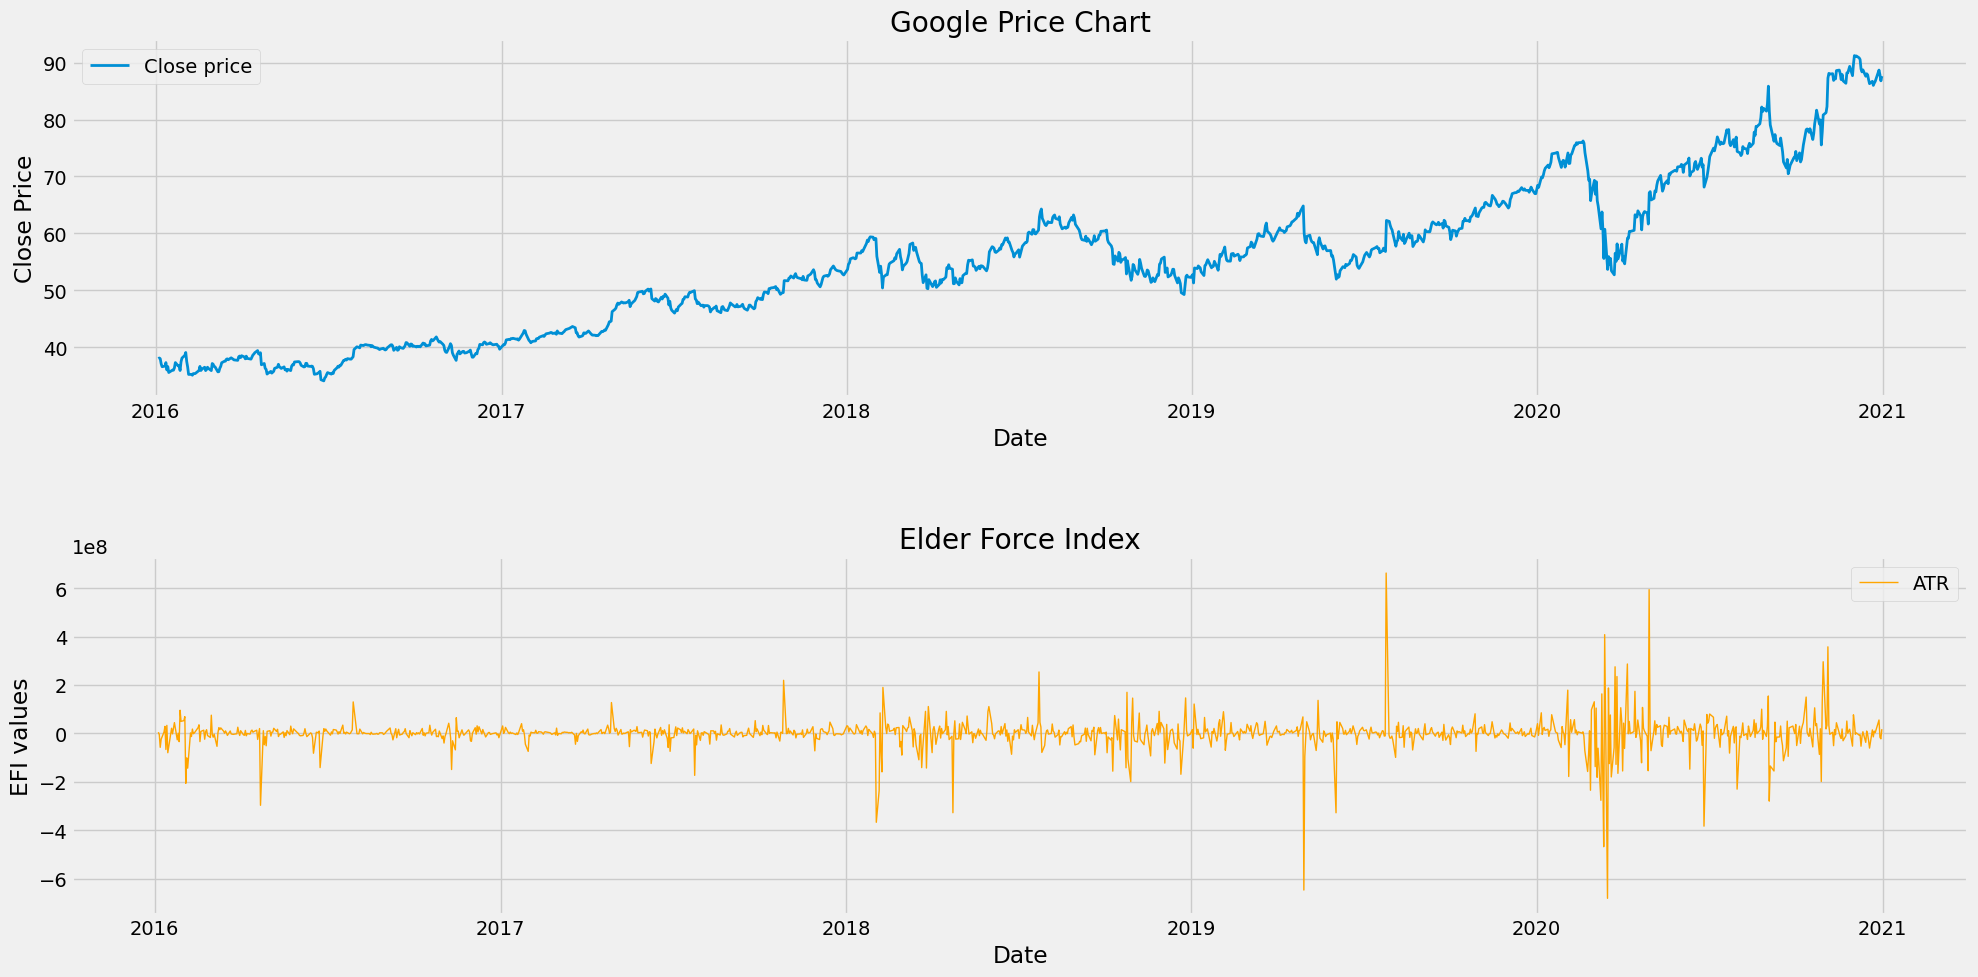

In [44]:
# Define position of 1st subplot
ax = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 2)

# Set the title and axis labels
plt.title('Google Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price', linewidth=2)

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx= plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 2)

# Set the title and axis labels
plt.title('Elder Force Index')
plt.xlabel('Date')
plt.ylabel('EFI values')

plt.plot(data['ForceIndex'] , 'm', label='ATR',color='orange',linewidth=1)

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()